In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

plt.style.use('fivethirtyeight')

# Gathering our data
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates = ['Date'])

df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis = 1)

# df.head()


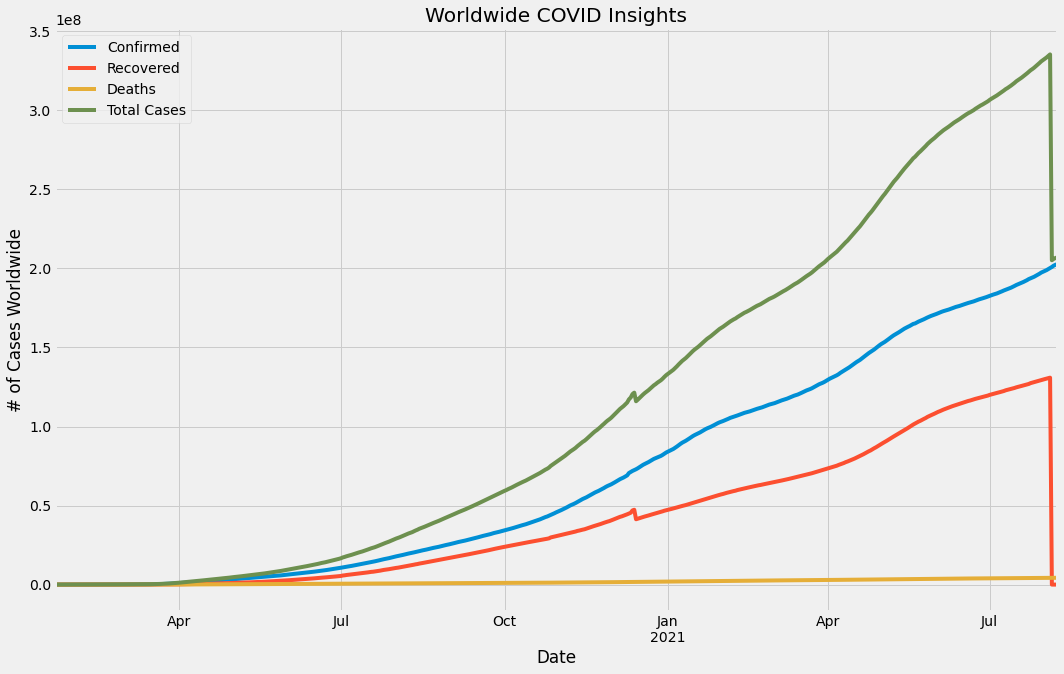

In [58]:
#Worldwide COVID insight - BOX plot
worldwide_df = df.groupby(['Date']).sum()
# worldwide_df.head()
w = worldwide_df.plot(figsize = (16, 10))
w.set_xlabel('Date')
w.set_ylabel('# of Cases Worldwide')
w.title.set_text('Worldwide COVID Insights')

plt.show()

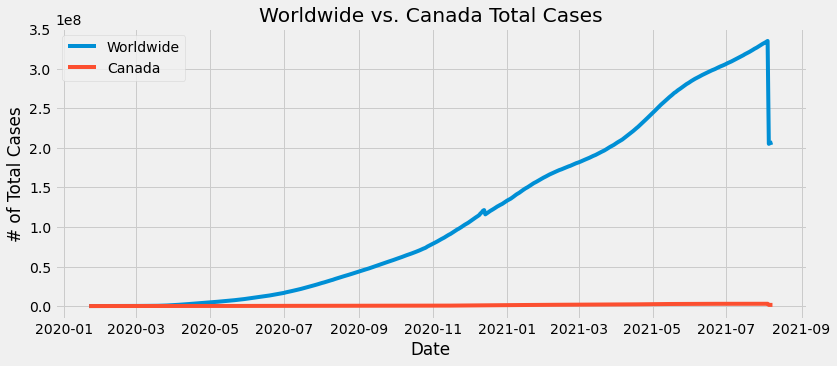

In [59]:
#Canada vs. Worldwide Cases - 

canada_df = df[df['Country'] == 'Canada'].groupby(['Date']).sum()
# congo_df = df[df['Country'] == 'Congo (Brazzaville)'].groupby(['Date']).sum()

fig_canada = plt.figure(figsize = (12, 5))
# fig_congo = plt.figure(figsize = (12, 15))

ax = fig_canada.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label = 'Worldwide')
ax.plot(canada_df[['Total Cases']], label = 'Canada')
ax.set_xlabel('Date')
ax.set_ylabel('# of Total Cases')
ax.title.set_text('Worldwide vs. Canada Total Cases')

plt.legend(loc='upper left')
plt.show()

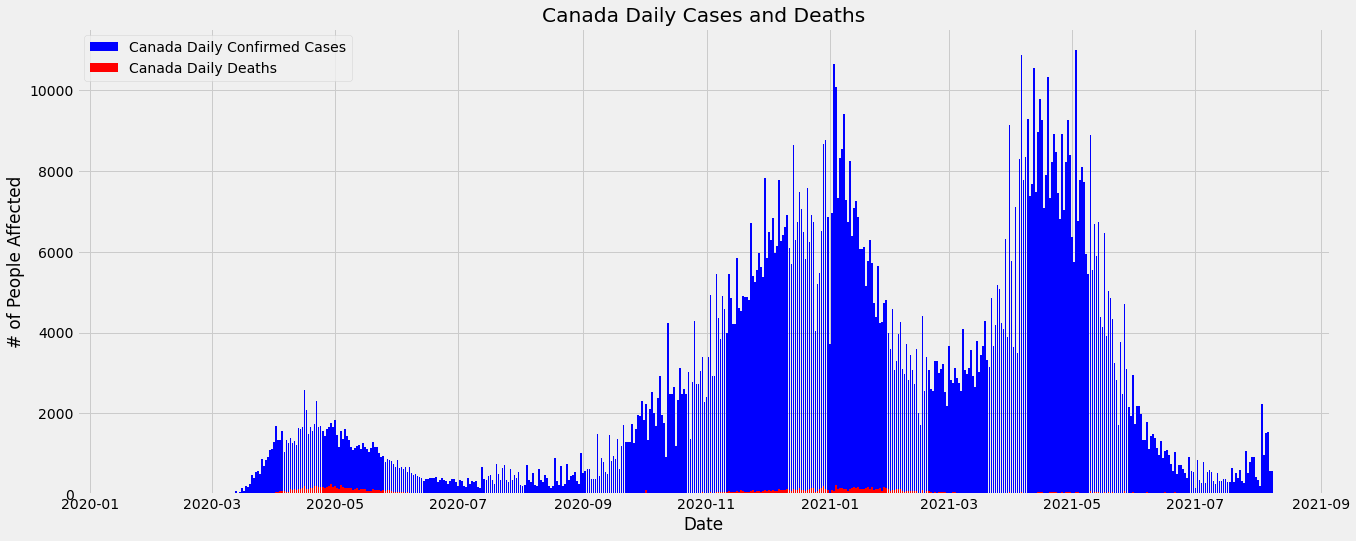

In [61]:
# Canada Daily Cases and Deaths

canada_df = canada_df.reset_index()
canada_df['Daily Confirmed'] = canada_df['Confirmed'].sub(canada_df['Confirmed'].shift())
canada_df['Daily Deaths'] = canada_df['Deaths'].sub(canada_df['Deaths'].shift())

fig_canada = plt.figure(figsize = (20, 8))
ax = fig_canada.add_subplot(111)

ax.bar(canada_df['Date'], canada_df['Daily Confirmed'], color = 'b', label = 'Canada Daily Confirmed Cases')
ax.bar(canada_df['Date'], canada_df['Daily Deaths'], color = 'r', label = 'Canada Daily Deaths')

ax.set_xlabel('Date')
ax.set_ylabel('# of People Affected')
ax.title.set_text('Canada Daily Cases and Deaths')

plt.legend(loc = 'upper left')
plt.show()

In [79]:
# Canada Cases Year overview

# Read file
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv',  
                 skiprows=1, index_col=0, parse_dates=[0])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 110174 entries, 2020-01-23 to 2021-08-08
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Afghanistan  110174 non-null  object
 1   0            110174 non-null  int64 
 2   0.1          110174 non-null  int64 
 3   0.2          110174 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.2+ MB


,Afghanistan,0,0.1,0.2
2020-01-22,,,,
2020-01-23,Afghanistan,0,0,0
2020-01-24,Afghanistan,0,0,0
2020-01-25,Afghanistan,0,0,0
2020-01-26,Afghanistan,0,0,0
2020-01-27,Afghanistan,0,0,0


In [73]:
# Making sure all our values are numbers, and remove the empty rows as well.
df['CASES'] = pd.to_numeric(df.CASES, errors='coerce')
df.dropna(inplace=True)

In [78]:
# create a copy of the dataframe, and add columns for month and year
df_m = df.copy()
df_m['month'] = [i.month for i in df_m.index]
df_m['year'] = [i.year for i in df_m.index]
# group by month and year, get the average
df_m = df_m.groupby(['month', 'year']).mean()
df_m = df[df.year.eq(2020)]
df_m.head()

AttributeError: 'DataFrame' object has no attribute 'year'